## Dataset Overview

The [COVID Confirmed Global](https://www.kaggle.com/datasets/baguspurnama/covid-confirmed-global) dataset provides a comprehensive, daily time series record of confirmed COVID-19 cases across the world.

### Key Features:
- **Geographical Coverage:** Global, with data broken down by country/region and, where available, province/state.
- **Date Range:** January 22, 2020 to the most recent update.
- **Granularity:** Daily counts of cumulative confirmed cases for each region.
- **Columns:**
  - `Province/State`: Subregion (if applicable)
  - `Country/Region`: Country name
  - `Lat`, `Long`: Latitude and Longitude
  - **Date columns:** Each subsequent column represents cumulative confirmed cases for that date.
- **Format:** Wide-format CSV (each date as a separate column).

### What Makes It Useful:
- Enables global and country-level analysis of COVID-19 spread.
- Allows for time series forecasting, anomaly detection, and trend analysis.
- Ideal for both visualization and machine learning applications, including predicting case trends and identifying unusual spikes/dr


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Covid19TimeseriesDataset.csv')


"plt.figure(figsize=(14,6))\nplt.plot(df['date'], df['patient_visits'], label='Patient Visits')\nplt.scatter(df[df['anomaly']]['date'], df[df['anomaly']]['patient_visits'], \n            color='red', label='Anomalies', marker='x')\nplt.title('Hospital Patient Visits Over Time')\nplt.xlabel('Date')\nplt.ylabel('Patient Visits')\nplt.legend()\nplt.show()"

In [11]:
df.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1147,1152,1170,1170,1173,1173,1177,1180,1182,1197
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,2363251,2373153,2383537,2393492,2407159,2428029,2450068,2473751,2497881,2517300
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,193736,194852,196044,196634,197113,197873,198898,200129,201158,202167
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,123,123
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,5296,5299,5300,5303,5310,5316,5318,5320,5324,5330


# A. Global Time Series

In [12]:
# Sum across all countries for each date column (starting from 5th column)
time_series = df.iloc[:, 4:].sum(axis=0)
time_series.index = pd.to_datetime(time_series.index)  # Convert date strings to datetime

# Create a DataFrame
global_df = pd.DataFrame({
    'date': time_series.index,
    'confirmed': time_series.values
})
print(global_df.head())


        date  confirmed
0 2020-01-22        557
1 2020-01-23        655
2 2020-01-24        941
3 2020-01-25       1433
4 2020-01-26       2118


C:\Users\hopeb\AppData\Local\Temp\ipykernel_42892\2821997717.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index)  # Convert date strings to datetime


# B. Country-Level Time Series (e.g., UK)

In [13]:
country = 'United Kingdom'

country_df = df[df['Country/Region'] == country]
country_series = country_df.iloc[:, 4:].sum(axis=0)
country_series.index = pd.to_datetime(country_series.index)

country_timeseries = pd.DataFrame({
    'date': country_series.index,
    'confirmed': country_series.values
})
print(country_timeseries.tail())


          date  confirmed
440 2021-04-06    4379033
441 2021-04-07    4381830
442 2021-04-08    4384954
443 2021-04-09    4380167
444 2021-04-10    4382880


C:\Users\hopeb\AppData\Local\Temp\ipykernel_42892\897182009.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  country_series.index = pd.to_datetime(country_series.index)


# Visualize the Data

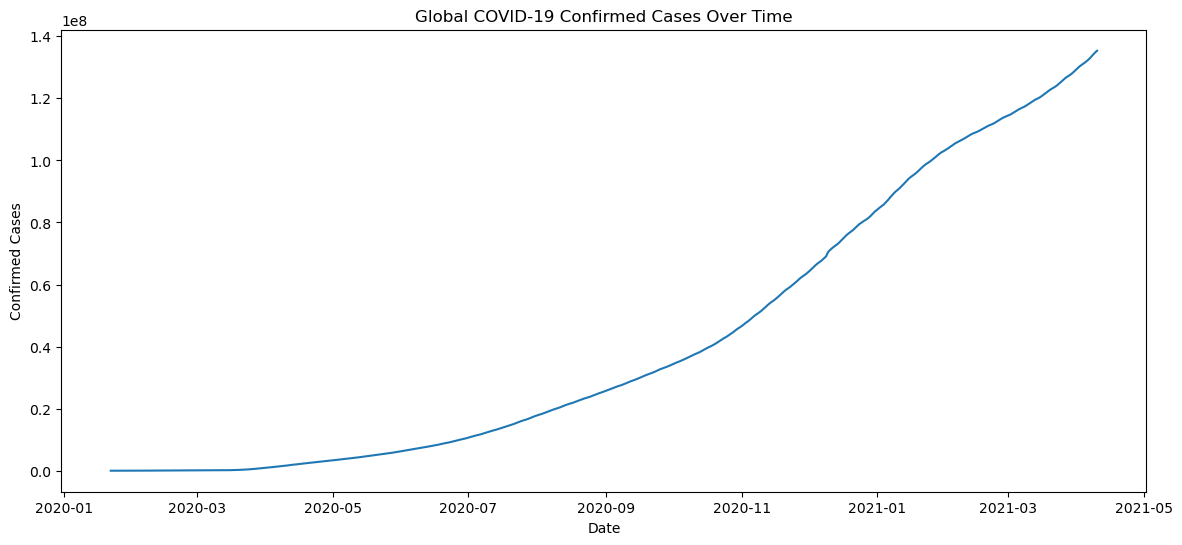

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(global_df['date'], global_df['confirmed'])
plt.title('Global COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()


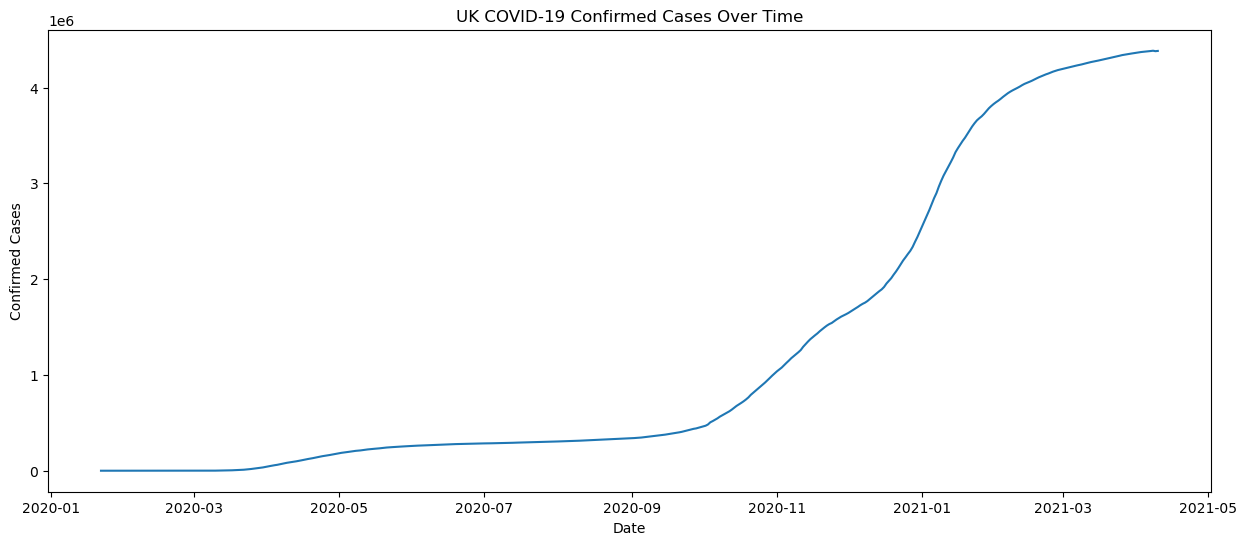

In [18]:
plt.figure(figsize=(15,6))
plt.plot(country_timeseries['date'], country_timeseries['confirmed'])
plt.title('UK COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Forecasting Daily New Cases

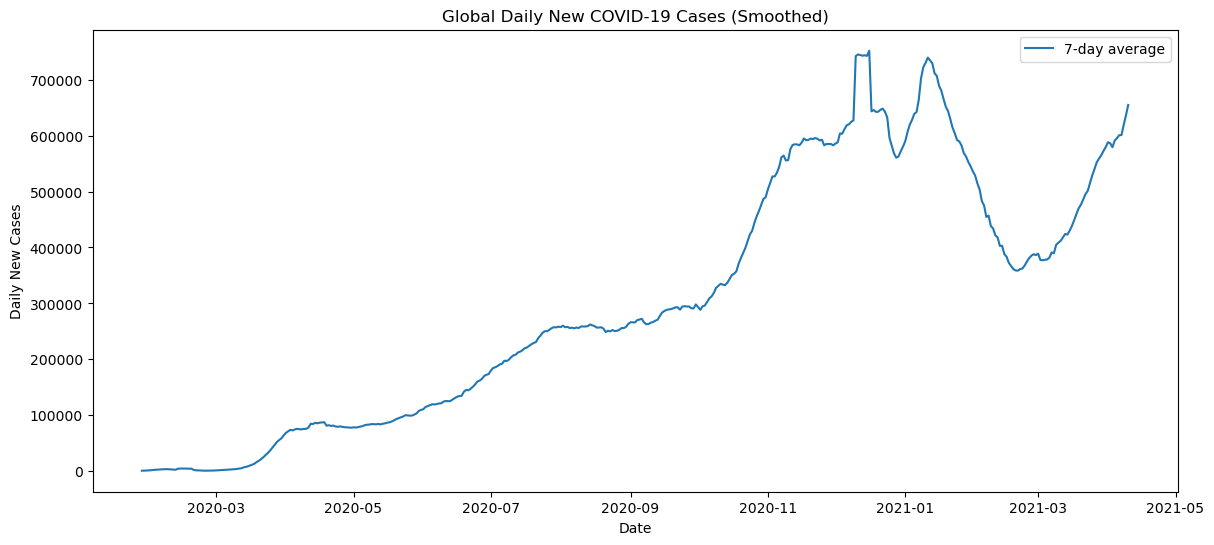

In [19]:
# Compute daily new cases
global_df['new_cases'] = global_df['confirmed'].diff().fillna(0)

# Optionally, smooth outliers with rolling mean
global_df['smoothed_new_cases'] = global_df['new_cases'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(global_df['date'], global_df['smoothed_new_cases'], label='7-day average')
plt.title('Global Daily New COVID-19 Cases (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.legend()
plt.show()


# Use for Forecasting and Anomaly Detection
Now you have a daily time series—perfect for:

Forecasting (e.g., with ARIMA, Random Forest, Prophet)

Anomaly Detection (e.g., z-score, Isolation Forest on daily changes)

For this use case, we're going to use z-score which is computed below

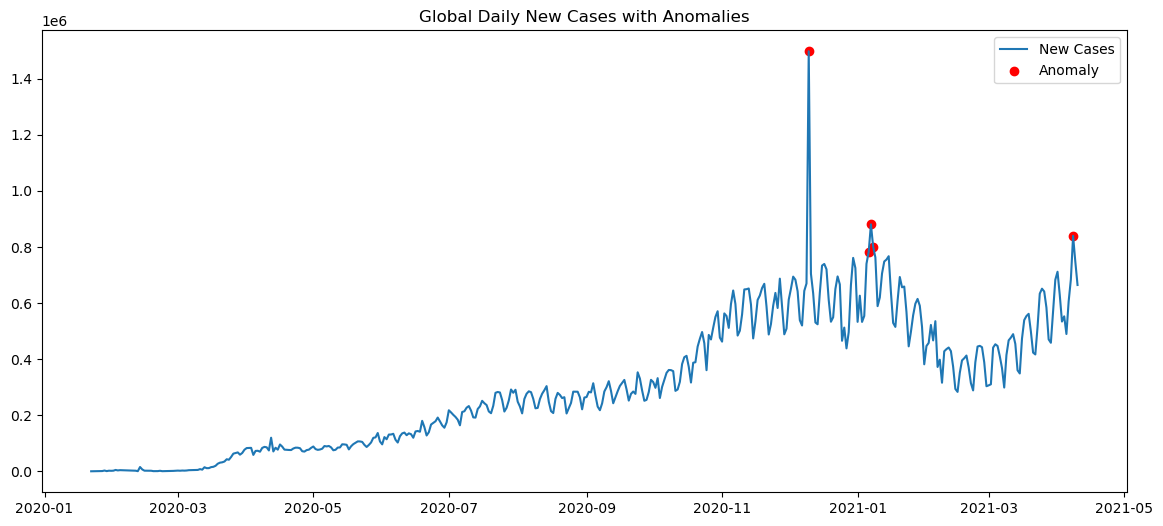

In [ ]:
import numpy as np

mean = global_df['new_cases'].mean()
std = global_df['new_cases'].std()
global_df['zscore'] = (global_df['new_cases'] - mean) / std
global_df['anomaly'] = global_df['zscore'].abs() > 2  # Customize threshold the biger the number,the less point will be flagged

# Plot with anomalies
plt.figure(figsize=(14,6))
plt.plot(global_df['date'], global_df['new_cases'], label='New Cases')
plt.scatter(global_df[global_df['anomaly']]['date'], global_df[global_df['anomaly']]['new_cases'],
            color='red', label='Anomaly')
plt.title('Global Daily New Cases with Anomalies')
plt.legend()
plt.show()


In [22]:
global_df.to_csv('global_covid_new_cases.csv', index=False)

